# Introduction of data

Both data files have the following construction:

|Header|	Definition|
|---|---|
|year|	Year|
|month|	Month|
|date_of_month|	Day number of the month
|day_of_week|	Day of week, where 1 is Monday and 7 is Sunday
|births|	Number of births|

In [296]:
import pandas as pd
US_births_1994_2003 = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')
US_births_2000_2014 = pd.read_csv('US_births_2000-2014_SSA.csv')

In [297]:
US_births_1994_2003.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [298]:
US_births_2000_2014.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


# Is the numer of births the same in the overlaping period?

In [299]:
US_births_1994_2003[US_births_1994_2003['year'] == 2000].head()

,year,month,date_of_month,day_of_week,births
2191,2000,1,1,6,8843
2192,2000,1,2,7,7816
2193,2000,1,3,1,11123
2194,2000,1,4,2,12703
2195,2000,1,5,3,12240


In [300]:
US_births_2000_2014[US_births_2000_2014['year'] == 2000].head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


# Dealing with overlap
There is a overlap between the datasets and the number of births is not the same. One solution is to make a new dataset with average births for the overlapping period.

In [301]:
import numpy as np
#select parts where the two df do not overlap
data94_99 = US_births_1994_2003[US_births_1994_2003['year'].between(1994,1999)] 
data04_14 = US_births_2000_2014[US_births_2000_2014['year'].between(2004,2014)]

# select parts where the two df overlap
data00_03_94 = US_births_1994_2003[US_births_1994_2003['year'].between(2000,2003)] 
data00_03_14 = US_births_2000_2014[US_births_2000_2014['year'].between(2000,2003)]

# get the values of birth column
births_94_03 = data00_03_94['births'].values
births_00_14 = data00_03_14['births'].values
# get average biths from 2000-2003
births00_03 = (births_94_03 + births_00_14) / 2

#select first 4 columns and make a df for period 2000-2003
data00_03 = data00_03_94[['year', 'month', 'date_of_month', 'day_of_week']]

#add the new column with average births 
data00_03['births'] = births00_03

#merging all the data into one df
frames = [data94_99,data00_03,data04_14]
data = pd.concat(frames)

# update - simpler way of handling the overlap

Add a new column in the form of datetime

In [302]:
# getting what is need for a timestamp:
date_94_03 = US_births_1994_2003.loc[:,['month','date_of_month','year']]
# rename 'date_of_month' to 'day', so pd.to_datetime recognizes what is what
date_94_03.rename(columns={'date_of_month':'day'},inplace = True)
# new column to original dataframe with datetime
US_births_1994_2003['date'] = pd.to_datetime(date_94_03)
US_births_1994_2003.head()

,year,month,date_of_month,day_of_week,births,date
0,1994,1,1,6,8096,1994-01-01
1,1994,1,2,7,7772,1994-01-02
2,1994,1,3,1,10142,1994-01-03
3,1994,1,4,2,11248,1994-01-04
4,1994,1,5,3,11053,1994-01-05


In [303]:
# getting what is need for a timestamp:
date_00_14 = US_births_2000_2014.loc[:,['month','date_of_month','year']]
# rename 'date_of_month' to 'day', so pd.to_datetime recognizes what is what
date_00_14.rename(columns={'date_of_month':'day'},inplace = True)
# new column to original dataframe with datetime
US_births_2000_2014['date'] = pd.to_datetime(date_00_14)
US_births_2000_2014.head()

,year,month,date_of_month,day_of_week,births,date
0,2000,1,1,6,9083,2000-01-01
1,2000,1,2,7,8006,2000-01-02
2,2000,1,3,1,11363,2000-01-03
3,2000,1,4,2,13032,2000-01-04
4,2000,1,5,3,12558,2000-01-05


## put the dataframes together
Use concat to combine the dataframes

In [304]:
dfs = [US_births_1994_2003, US_births_2000_2014]
df = pd.concat(dfs)
print(US_births_1994_2003.shape, US_births_2000_2014.shape, df.shape)

(3652, 6) (5479, 6) (9131, 6)


## sort the overlap with pivot table

In [367]:
births = df.pivot_table(index='date')
print(births.shape, data.shape)
births[births['year']==2000].head()

(7670, 5) (7670, 5)


,births,date_of_month,day_of_week,month,year
date,,,,,
2000-01-01,8963.0,1.0,6.0,1.0,2000.0
2000-01-02,7911.0,2.0,7.0,1.0,2000.0
2000-01-03,11243.0,3.0,1.0,1.0,2000.0
2000-01-04,12867.5,4.0,2.0,1.0,2000.0
2000-01-05,12399.0,5.0,3.0,1.0,2000.0


# Analysis

## Number of births per month

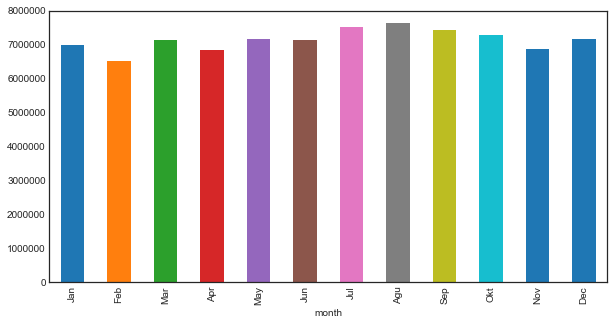

    month     births months
0       8  7610274.0    Agu
1       7  7514039.5    Jul
2       9  7425979.0    Sep
3      10  7278954.5    Okt
4       5  7162957.0    May
5      12  7139173.5    Dec
6       3  7134653.0    Mar
7       6  7110327.5    Jun
8       1  6965337.0    Jan
9      11  6869516.5    Nov
10      4  6838788.0    Apr
11      2  6499483.0    Feb


In [368]:
import matplotlib.pyplot as plt

total_births_month = data.pivot_table(index='month', values='births', aggfunc= sum)
total_births_month["months"] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Agu','Sep','Okt','Nov','Dec']

plt.subplots(figsize=(10,5))
total_births_month["births"].plot.bar()
plt.xticks(np.arange(0,12,1),total_births_month['months'])
plt.show()

print(total_births_month.sort_values('births', ascending=False).reset_index())

## Total number of days per month

In [307]:
data['month'].value_counts()

7     651
3     651
10    651
5     651
1     651
12    651
8     651
11    630
6     630
9     630
4     630
2     593
Name: month, dtype: int64

## Average births per day in a month

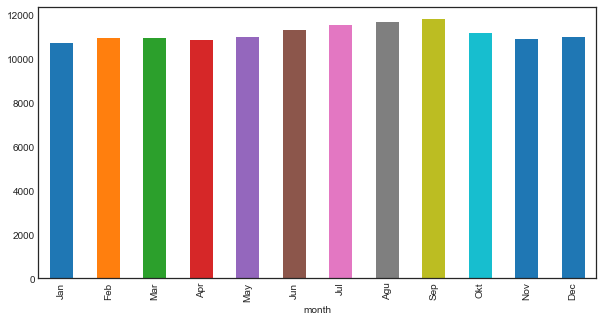

    month        births months
0       9  11787.268254    Sep
1       8  11690.129032    Agu
2       7  11542.303379    Jul
3       6  11286.234127    Jun
4      10  11181.189708    Okt
5       5  11003.006144    May
6      12  10966.472350    Dec
7       2  10960.342327    Feb
8       3  10959.528418    Mar
9      11  10903.994444    Nov
10      4  10855.219048    Apr
11      1  10699.442396    Jan


In [369]:
avr_birth_month = data.pivot_table(index='month', values='births')
avr_birth_month["months"] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Agu','Sep','Okt','Nov','Dec']

plt.subplots(figsize=(10,5))
avr_birth_month["births"].plot.bar()
plt.xticks(np.arange(0,12,1),avr_birth_month['months'])
plt.show()
print(avr_birth_month.sort_values('births', ascending=False).reset_index())

# Births per year

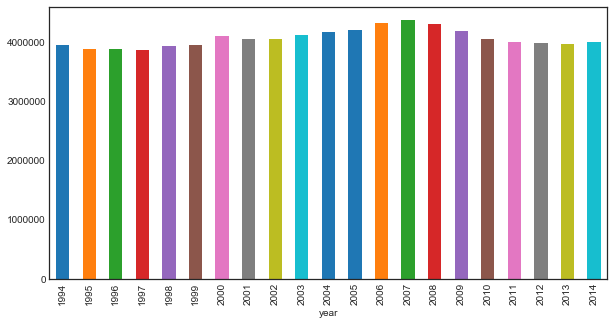

    year     births
0   2007  4380784.0
1   2006  4335154.0
2   2008  4310737.0
3   2005  4211941.0
4   2009  4190991.0
5   2004  4186863.0
6   2003  4126505.0
7   2000  4104206.0
8   2001  4068448.0
9   2002  4060519.5
10  2010  4055975.0
11  2014  4010532.0
12  2011  4006908.0
13  2012  4000868.0
14  2013  3973337.0
15  1999  3959417.0
16  1994  3952767.0
17  1998  3941553.0
18  1995  3899589.0
19  1996  3891494.0
20  1997  3880894.0


In [370]:
births_year = data.pivot_table(index='year', values='births', aggfunc='sum')
plt.subplots(figsize=(10,5))
births_year["births"].plot.bar()
plt.show()
print(births_year.sort_values('births', ascending=False).reset_index())

# Births per weekday

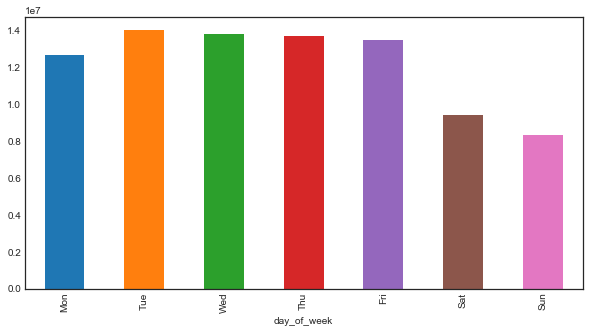

                 births weekday
day_of_week                    
2            14044984.5     Tue
3            13803894.5     Wed
4            13717755.5     Thu
5            13497754.0     Fri
1            12696783.0     Mon
6             9433667.5     Sat
7             8354643.5     Sun
Chance of weekend birth: 20.79%, What would be expected in equal distribution of births: 28.57%


In [357]:
births_weekday = data.pivot_table(index='day_of_week', values='births', aggfunc='sum')
births_weekday['weekday'] = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.subplots(figsize=(10,5))
births_weekday['births'].plot.bar()
plt.xticks(np.arange(0,7,1),births_weekday['weekday'])
plt.show()

print(births_weekday.sort_values('births', ascending=False))
#what is the chance of weekend birth
weekdays = sum(births_weekday['births'][0:5])
weekends = sum(births_weekday['births'][5:7])
weekendchance = (weekends/(weekdays+weekends))
expected = 2/7
s = 'Chance of weekend birth: ' + repr(round(weekendchance*100,2)) +'%, What would be expected in equal distribution of births: ' + repr(round(expected*100,2))+'%'
print(s)

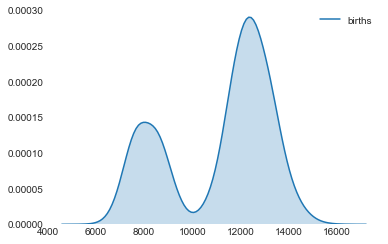

In [318]:
import seaborn as sns
sns.set_style('white')
sns.kdeplot(data["births"], shade=True)
sns.despine(left=True, bottom=True)


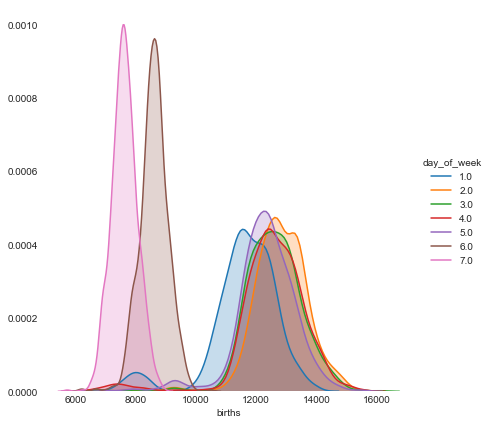

In [363]:
g = sns.FacetGrid(births, hue="day_of_week", size=6)
g.map(sns.kdeplot, "births", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

# Births 1994-2014

In [312]:
births.reset_index(inplace=True)

In [313]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)


plotly.offline.iplot({
    "data": [go.Scatter(x=births.date, y=births.births)],
    "layout": go.Layout(title="Births per date 1994-2014")
})

# Aggregated births per date 1994-2014

In [342]:
year_dist = births.pivot_table(index=['month','date_of_month'], values=['births'],aggfunc='sum')

In [343]:
year_dist.head()

births
month date_of_month          
1.0   1.0            163998.0
      2.0            195959.5
      3.0            227662.0
      4.0            231873.5
      5.0            230421.0

In [344]:
# just to make dates, so it is easier to read of the graph
from datetime import datetime
start = datetime.strptime('1/1/16','%m/%d/%y')
end = datetime.strptime('12/31/16','%m/%d/%y')

daterange = pd.date_range(start, end)
year_dates = [datetime.strftime(i,'%d-%b') for i in daterange]

In [345]:
plotly.offline.iplot({
    "data": [go.Scatter(x=year_dates,y=year_dist.births)],
    "layout": go.Layout(title="Distribution of births")
})